In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import torch
import torch.linalg
import matplotlib.pyplot as plt

c:\Users\logan_asqucew\miniconda3\envs\tf_gpu\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Before Torch Converesion

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
(966, 150)
(322, 150)
(966,)


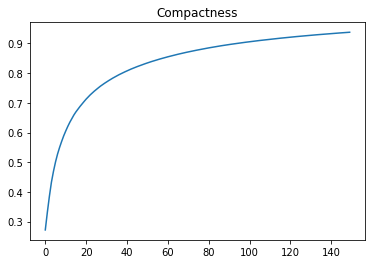

Total Testing 322
Predictions [3 3 6 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3
 3 1 1 3 3 3 1 3 1 6 3 3 3 3 3 3 3 3 1 1 3 3 3 1 3 1 3 1 3 3 3 3 3 6 3 3 3
 3 1 3 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 6 3 3 3 3 3 3 3 3 3 3 3
 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 1 6 6 6 3 3 3 3 3 1 6 3 3 3 1 3 3 1 3
 3 1 3 3 3 3 3 3 3 3 1 3 6 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 1 3
 3 3 3 3 3 3 1 3 3 6 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 1 1 1 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 6 3 6 3 3 6
 3 3 3 3 1 3 3 3 3 3 6 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Which Correct: [ True  True  True  True  True  True False  True  True  True  True  True
  True False  True  True  True  True  True False False False  True False
 False  True False  True  True  True False  True  True  True  True  True
  True  True False  True  True False  True  True False  True False  True
 False  T

c:\Users\logan_asqucew\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\logan_asqucew\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\logan_asqucew\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean
#Eigen-decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))
#project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
        
    plot_gallery(eigenfaces, eigenface_titles, h, w)
    plt.show()

explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]
4
predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)
#print("Gnd Truth:", y_test)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)    
print(classification_report(y_test, predictions, target_names=target_names))


After Torch conversion

In [4]:
#download data
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
#introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = torch.tensor(lfw_people.data)
n_features = X.shape[1]
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [5]:
# Split into a training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

In [6]:
#Center data
mean = torch.mean(X_train, axis=0)
X_train -= mean
X_test -= mean
#Eigen-decomposition
U, S, V = torch.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))
#project into PCA subspace
X_transformed = torch.matmul(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = torch.matmul(X_test, components.T)
print(X_test_transformed.shape)

torch.Size([966, 150])
torch.Size([322, 150])


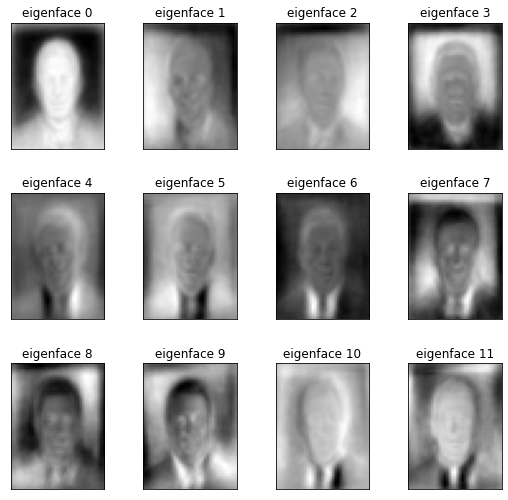

In [7]:
import matplotlib.pyplot as plt
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

torch.Size([966])


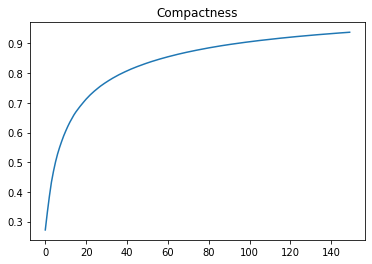

In [8]:
explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)


estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]
4
predictions = estimator.predict(X_test_transformed)

correct = predictions==y_test
total_test = len(X_test_transformed)
#print("Gnd Truth:", y_test)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)
print(classification_report(y_test, predictions, target_names=target_names))


Total Testing 322
Predictions [3 3 6 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3
 3 1 1 3 1 3 1 1 1 1 3 3 3 3 3 3 3 3 1 1 3 3 3 1 3 1 3 3 3 3 3 3 3 6 3 3 3
 3 1 3 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3
 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 6 6 3 3 3 3 3 1 6 6 3 3 1 3 3 1 3
 3 1 3 3 3 3 3 3 3 3 1 3 6 1 3 1 3 3 3 1 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 1 6 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 6 3 3 6
 3 3 3 3 3 3 3 3 3 3 6 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 6 3 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3]
Which Correct: [ True  True  True  True  True  True False  True  True  True  True  True
  True False  True  True  True  True  True False False False  True False
 False  True False  True  True  True False  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True False  True
 False  T

c:\Users\logan_asqucew\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\logan_asqucew\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\logan_asqucew\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Question 2

In [10]:
#download data
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
X_train = tf.Variable(X_train)
X_test = tf.Variable(X_test)
X_train = tf.reshape(X_train, (int(n_samples * 0.75), h,w,1)) / 255
X_test = tf.reshape(X_test, (int(n_samples * 0.25), h,w,1)) / 255


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
X_train shape: (966, 1850)


Dense Network

In [11]:
from keras.models import Sequential
from keras.layers import *

model = Sequential()

model.add(Flatten())
model.add(Dense(h*w, activation = "relu", input_shape=(h,w,1,)))

model.add(Dense(h*w, activation = "relu"))

model.add(Dense(h*w, activation = "relu"))
model.add(Dense(n_classes, activation = "softmax"))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 32)

Epoch 1/50
31/31 [==============================] - 2s 11ms/step - loss: 1.7581 - accuracy: 0.3934 - val_loss: 1.6075 - val_accuracy: 0.4534
Epoch 2/50
31/31 [==============================] - 0s 6ms/step - loss: 1.7075 - accuracy: 0.3975 - val_loss: 1.5895 - val_accuracy: 0.4534
Epoch 3/50
31/31 [==============================] - 0s 5ms/step - loss: 1.6568 - accuracy: 0.3975 - val_loss: 1.5465 - val_accuracy: 0.4534
Epoch 4/50
31/31 [==============================] - 0s 6ms/step - loss: 1.6474 - accuracy: 0.3986 - val_loss: 1.5449 - val_accuracy: 0.4534
Epoch 5/50
31/31 [==============================] - 0s 6ms/step - loss: 1.6047 - accuracy: 0.3996 - val_loss: 1.6075 - val_accuracy: 0.4752
Epoch 6/50
31/31 [==============================] - 0s 5ms/step - loss: 1.5572 - accuracy: 0.4224 - val_loss: 1.4698 - val_accuracy: 0.5000
Epoch 7/50
31/31 [==============================] - 0s 5ms/step - loss: 1.4670 - accuracy: 0.4658 - val_loss: 1.4157 - val_accuracy: 0.5311
Epoch 8/50
31/31 [=

Convulation Network

In [12]:
from keras.models import Sequential
from keras.layers import *

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),input_shape=(h,w,1), activation = "relu"))
model.add(Conv2D(32,kernel_size=(3,3), activation = "relu"))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))

model.add(Dense(7, activation = "softmax"))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 1)

Epoch 1/50
966/966 [==============================] - 7s 4ms/step - loss: 1.7429 - accuracy: 0.3965 - val_loss: 1.6189 - val_accuracy: 0.4534
Epoch 2/50
966/966 [==============================] - 4s 4ms/step - loss: 1.7158 - accuracy: 0.3975 - val_loss: 1.6483 - val_accuracy: 0.4534
Epoch 3/50
966/966 [==============================] - 4s 4ms/step - loss: 1.7189 - accuracy: 0.3975 - val_loss: 1.6185 - val_accuracy: 0.4534
Epoch 4/50
966/966 [==============================] - 4s 4ms/step - loss: 1.7180 - accuracy: 0.3975 - val_loss: 1.6086 - val_accuracy: 0.4534
Epoch 5/50
966/966 [==============================] - 4s 4ms/step - loss: 1.7136 - accuracy: 0.3975 - val_loss: 1.5982 - val_accuracy: 0.4534
Epoch 6/50
966/966 [==============================] - 4s 4ms/step - loss: 1.7186 - accuracy: 0.3975 - val_loss: 1.6141 - val_accuracy: 0.4534
Epoch 7/50
966/966 [==============================] - 4s 4ms/step - loss: 1.7158 - accuracy: 0.3975 - val_loss: 1.6058 - val_accuracy: 0.4534
Epoch 

Cifar10

In [13]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import *
from keras import regularizers
x, y = tf.keras.datasets.cifar10.load_data()
h = 32
w = 32

X_train, y_train = x
X_test, y_test = y
X_train = tf.reshape(X_train, (50000, h,w,3)) / 255
X_test = tf.reshape(X_test, (10000, h,w,3)) / 255


In [14]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),input_shape=(h,w,3), activation = "relu"))
model.add(Conv2D(64,kernel_size=(3,3),input_shape=(h,w,3), activation = "relu"))
model.add(MaxPooling2D((2,2), padding = "same"))
model.add(Dropout(0.3))
model.add(Conv2D(128,kernel_size=(3,3), activation = "relu"))
model.add(Conv2D(128,kernel_size=(3,3), activation = "relu"))
model.add(MaxPooling2D((2,2),padding = "same"))
model.add(Dropout(0.4))
model.add(Conv2D(256,kernel_size=(3,3), activation = "relu"))
model.add(Conv2D(256,kernel_size=(3,3), activation = "relu"))
model.add(MaxPooling2D((2,2), padding = "same"))
model.add(Dropout(0.4))
model.add(Flatten())

model.add(Dense(1024, activation = "relu"))
model.add(LeakyReLU())
model.add(Dense(512, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer=keras.optimizers.Adam(),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 45, batch_size = 64)

Epoch 1/45
782/782 [==============================] - 10s 12ms/step - loss: 1.7485 - accuracy: 0.3408 - val_loss: 1.4555 - val_accuracy: 0.4707
Epoch 2/45
782/782 [==============================] - 8s 11ms/step - loss: 1.3361 - accuracy: 0.5185 - val_loss: 1.1785 - val_accuracy: 0.5783
Epoch 3/45
782/782 [==============================] - 8s 11ms/step - loss: 1.1700 - accuracy: 0.5832 - val_loss: 1.0949 - val_accuracy: 0.6141
Epoch 4/45
782/782 [==============================] - 8s 11ms/step - loss: 1.0567 - accuracy: 0.6298 - val_loss: 0.9633 - val_accuracy: 0.6760
Epoch 5/45
782/782 [==============================] - 9s 11ms/step - loss: 0.9655 - accuracy: 0.6635 - val_loss: 0.8648 - val_accuracy: 0.7000
Epoch 6/45
782/782 [==============================] - 9s 11ms/step - loss: 0.9079 - accuracy: 0.6847 - val_loss: 0.8051 - val_accuracy: 0.7251
Epoch 7/45
782/782 [==============================] - 9s 11ms/step - loss: 0.8598 - accuracy: 0.7028 - val_loss: 0.7996 - val_accuracy: 0.726

In [15]:

model = keras.models.load_model('80 CNN network')
# model.summary()

model.evaluate(X_test, y_test, batch_size = 64)

157/157 [==============================] - 1s 5ms/step - loss: 0.6111 - accuracy: 0.8062


[0.6111472845077515, 0.8062000274658203]